In [ ]:
import numpy as np
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/Ranganath0108/Smart-irrigtion-using-Cayenne-IoT/version1.2/CropPredictionDataSet.csv"
#need to be changed whenever nesccesery

df=pd.read_csv(url)


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#Exploratory Data Analysis
Heatmap to check null/missing values



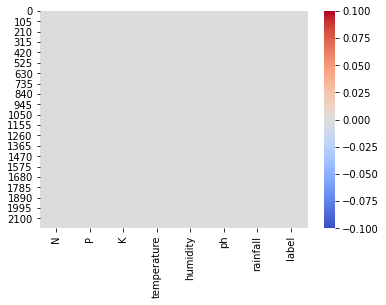

In [ ]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

#Compare Ph and Temprature


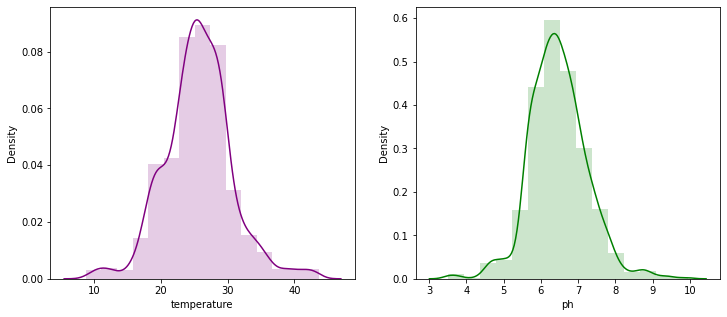

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!


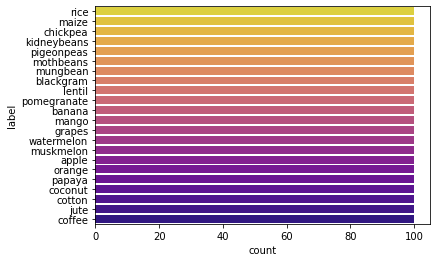

In [ ]:
# checking data set is balanced or not
#  If found imbalanced, we would have to downsample some targets which are more in quantity 


sns.countplot(y='label',data=df, palette="plasma_r")

visulation of diagonal distribution between two features for all combination.To visualize how classes differ from each other in a particular space

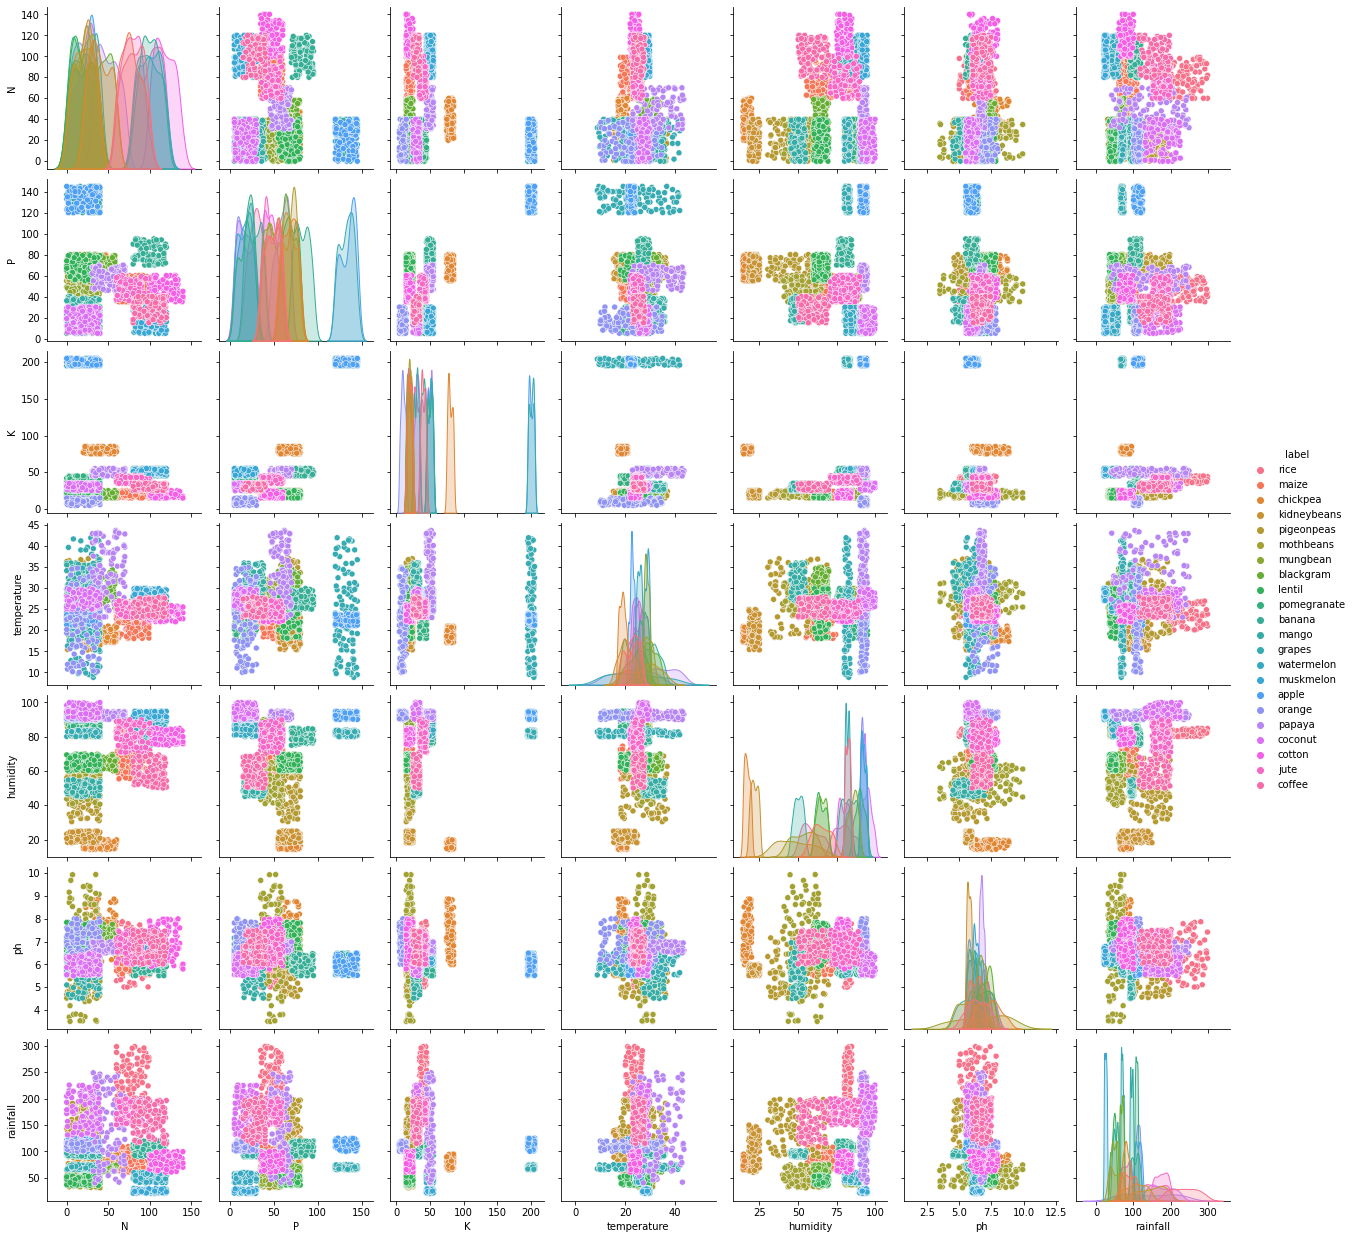

In [ ]:
sns.pairplot(df, hue = 'label')

During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).
####Rain affects soil moisture which affects ph of the soil. *

->Here are the crops which are likely to be planted during this season.

->Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
->Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.


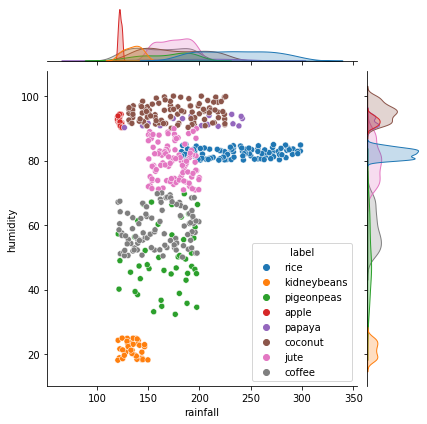

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

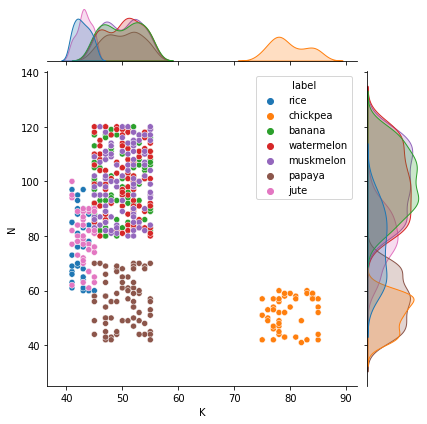

In [ ]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

Above graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values


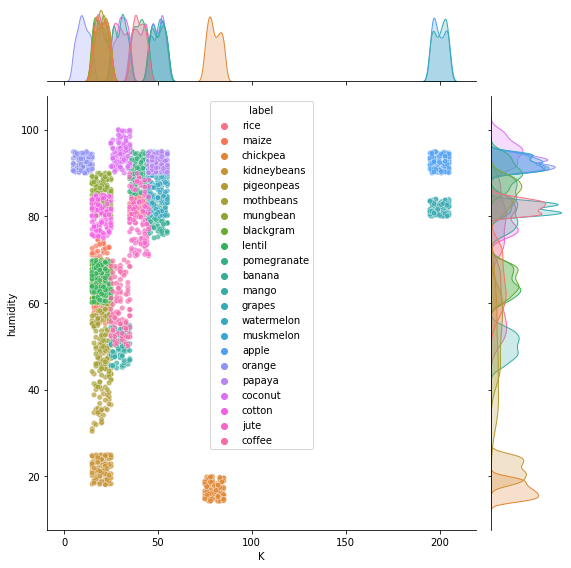

In [13]:
# plot a specfic case of pairplot between `humidity` and `K`
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

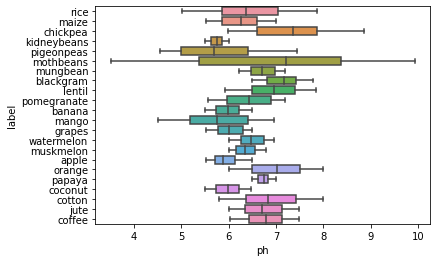

In [14]:
sns.boxplot(y='label',x='ph',data=df)


Further analyzing phosphorous levels.
When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.


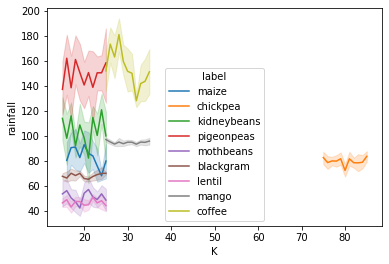

In [15]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

#Data Preprocessing
making data ready for machine learning model 

In [16]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated

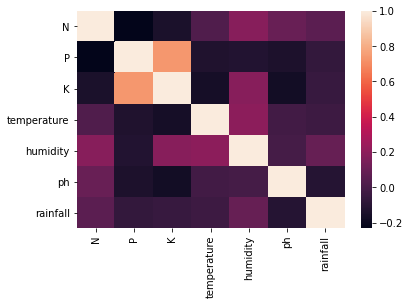

In [17]:

sns.heatmap(X.corr())

#FEATURE SCALING
Feature scaling is required before creating training data and feeding it to the model.

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MODEL SELECTION


Descion Tree Clasiffication

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

visualize the import features which are taken into consideration by decision trees.

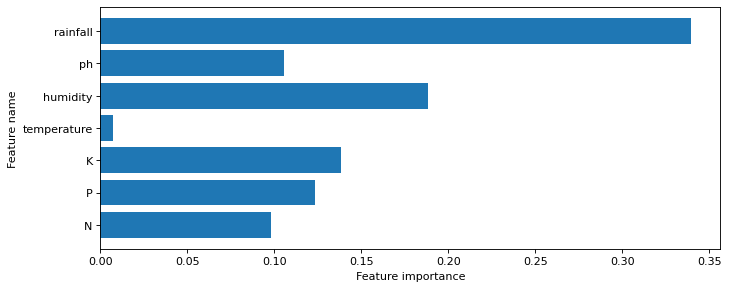

In [25]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()